In [1]:
# import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV, StratifiedKFold, learning_curve
from sklearn.ensemble import RandomForestClassifier

#libraries required for logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

#Libraries required for SVM
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn import model_selection, naive_bayes, svm, metrics, feature_extraction

#Libraries required for KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [2]:
# Reading the data set
df = pd.read_csv(r"D:\fhrw-4uyv.csv")

In [3]:
df

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-08-23T12:35:54.000,43624241,HEAT/HOT WATER,10032.0,560 WEST 160 STREET,WEST 160 STREET,ADDRESS,NEW YORK,The complaint you filed is a duplicate of a co...,MANHATTAN,40.835396,-73.942262,NaN,RESIDENTIAL BUILDING,Open
1,2019-08-23T08:43:58.000,43623659,UNSANITARY CONDITION,11208.0,261 MONTAUK AVENUE,MONTAUK AVENUE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.672494,-73.877521,NaN,RESIDENTIAL BUILDING,Open
2,2019-08-23T09:08:09.000,43624463,UNSANITARY CONDITION,10002.0,125 MADISON STREET,MADISON STREET,ADDRESS,NEW YORK,The following complaint conditions are still o...,MANHATTAN,40.712353,-73.993947,NaN,RESIDENTIAL BUILDING,Open
3,2019-08-23T16:36:08.000,43625072,DOOR/WINDOW,11211.0,525 UNION AVENUE,UNION AVENUE,ADDRESS,BROOKLYN,The following complaint conditions are still o...,BROOKLYN,40.716233,-73.951986,NaN,RESIDENTIAL BUILDING,Open
4,2019-08-23T11:15:00.000,43623738,UNSANITARY CONDITION,11372.0,35-52F 73 STREET,73 STREET,ADDRESS,Jackson Heights,NaN,QUEENS,40.750533,-73.892998,NaN,RESIDENTIAL BUILDING,Open
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5846782,2019-03-24T08:17:07.000,42043830,HEAT/HOT WATER,11217.0,140 5 AVENUE,5 AVENUE,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a co...,BROOKLYN,40.678621,-73.978978,2019-03-25T21:19:25.000,RESIDENTIAL BUILDING,Closed
5846783,2019-03-24T00:09:32.000,42043831,HEAT/HOT WATER,11214.0,8100 BAY PARKWAY,BAY PARKWAY,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a co...,BROOKLYN,40.604708,-73.990950,2019-03-25T21:27:24.000,RESIDENTIAL BUILDING,Closed
5846784,2019-03-23T23:27:03.000,42043834,HEAT/HOT WATER,11238.0,601 PARK PLACE,PARK PLACE,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a co...,BROOKLYN,40.674495,-73.958221,2019-03-25T02:08:33.000,RESIDENTIAL BUILDING,Closed
5846785,2019-03-24T12:11:04.000,42043835,HEAT/HOT WATER,11220.0,861 48 STREET,48 STREET,ADDRESS,BROOKLYN,The complaint you filed is a duplicate of a co...,BROOKLYN,40.641472,-74.001265,2019-03-25T08:32:53.000,RESIDENTIAL BUILDING,Closed


In [4]:
# Dateset is big so taking sample 

x = df.sample(580000)

In [5]:
#To find out information about non null values and datatypes for different columns

x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 580000 entries, 1064994 to 5248062
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   created_date            580000 non-null  object 
 1   unique_key              580000 non-null  int64  
 2   complaint_type          580000 non-null  object 
 3   incident_zip            572220 non-null  float64
 4   incident_address        574919 non-null  object 
 5   street_name             574919 non-null  object 
 6   address_type            571837 non-null  object 
 7   city                    572268 non-null  object 
 8   resolution_description  578709 non-null  object 
 9   borough                 580000 non-null  object 
 10  latitude                572225 non-null  float64
 11  longitude               572225 non-null  float64
 12  closed_date             567650 non-null  object 
 13  location_type           574919 non-null  object 
 14  status            

In [6]:
# Total no of Rows and Columns of main data

x.shape

(580000, 15)

In [7]:
#In order to get basic statistical values such as mean, standard deviation, minimum etc. for all numerical columns 

x.describe()

,unique_key,incident_zip,latitude,longitude
count,5.800000e+05,572220.000000,572225.000000,572225.000000
mean,2.912292e+07,10747.848590,40.753985,-73.919909
std,7.571837e+06,513.187939,0.090886,0.056917
min,1.563176e+07,10001.000000,40.499440,-74.250733
25%,2.276682e+07,10452.000000,40.671019,-73.951979
50%,2.901632e+07,10469.000000,40.756117,-73.922483
75%,3.532237e+07,11224.000000,40.839410,-73.890239
max,4.362684e+07,11697.000000,40.912218,-73.700786


In [8]:
# checking null values

x.isnull().sum()

created_date                  0
unique_key                    0
complaint_type                0
incident_zip               7780
incident_address           5081
street_name                5081
address_type               8163
city                       7732
resolution_description     1291
borough                       0
latitude                   7775
longitude                  7775
closed_date               12350
location_type              5081
status                        0
dtype: int64

In [9]:
#Converting the null values into percentage

(x.isnull().sum() / len(df)) * 100

created_date              0.000000
unique_key                0.000000
complaint_type            0.000000
incident_zip              0.133065
incident_address          0.086902
street_name               0.086902
address_type              0.139615
city                      0.132244
resolution_description    0.022081
borough                   0.000000
latitude                  0.132979
longitude                 0.132979
closed_date               0.211227
location_type             0.086902
status                    0.000000
dtype: float64

<Axes: >

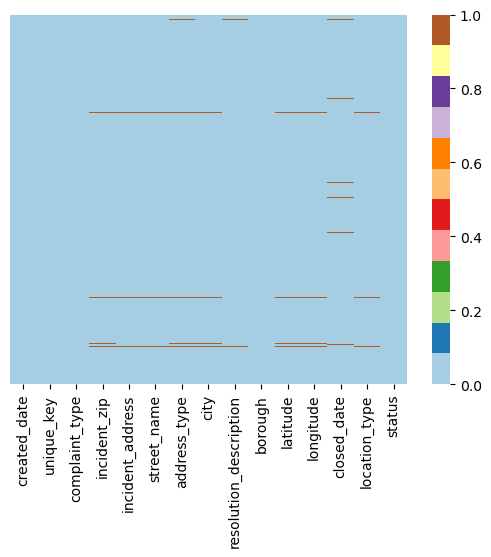

In [10]:
#Visualization of null values using the heatmap

sns.heatmap(x.isnull(),yticklabels=False,cmap="Paired")

In [11]:
x['incident_zip'].fillna(x['incident_zip'].mean(), inplace = True)
x['latitude'].fillna(x['latitude'].mean(), inplace = True)
x['longitude'].fillna(x['longitude'].mean(), inplace = True)

In [12]:
a = ['incident_address','street_name','address_type','city',
     'resolution_description','borough','latitude','location_type','status']

In [13]:
# Filling the null values
for i in a :
    x[i].bfill(inplace=True)

In [14]:
x.drop(['closed_date','created_date'],axis=1, inplace=True)

<Axes: >

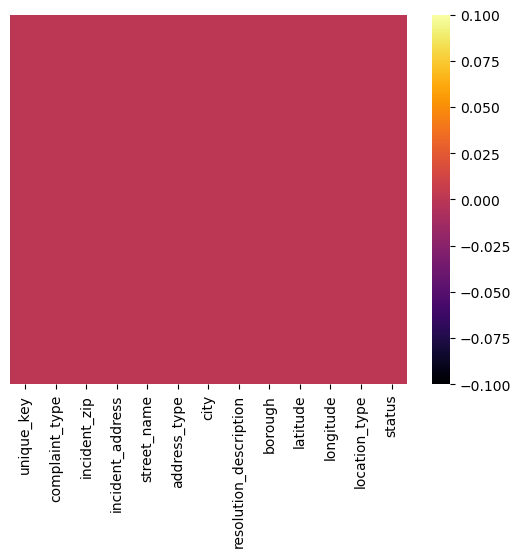

In [15]:
#Visualization of null values using the heatmap

sns.heatmap(x.isnull(),yticklabels=False,cmap="inferno")

# Question 1: Get the Top 5 Complaint Type

In [16]:
x.loc[df['complaint_type'] == 'HEATING', 'complaint_type'] = 'HEAT/HOT WATER'
x.loc[df['complaint_type'] == 'PAINT - PLASTER', 'complaint_type'] = 'PAINT/PLASTER'


print ('Top 5 complaints:')
x['complaint_type'].value_counts().head()

Top 5 complaints:


complaint_type
HEAT/HOT WATER          201904
PLUMBING                 70302
PAINT/PLASTER            69302
GENERAL CONSTRUCTION     49926
UNSANITARY CONDITION     43494
Name: count, dtype: int64

<Axes: >

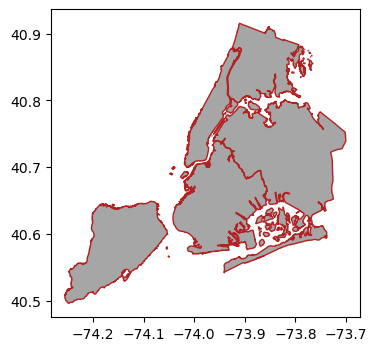

In [17]:
import geopandas as gpd
import requests
from io import BytesIO
# Loading the GeoJSON data directly from the URL
url = 'https://raw.githubusercontent.com/kd0998/Capstone-NYC-311-Complaint/main/new-york-city-boroughs.geojson'
response = requests.get(url)
geojson_data = BytesIO(response.content)
borough_map = gpd.read_file(geojson_data)

fig, ax = plt.subplots(figsize=(4, 4)) 
borough_map['geometry'].boundary.plot(edgecolor='firebrick', linewidth=1, ax=ax)
borough_map.plot(color='grey', alpha=0.7, ax=ax)

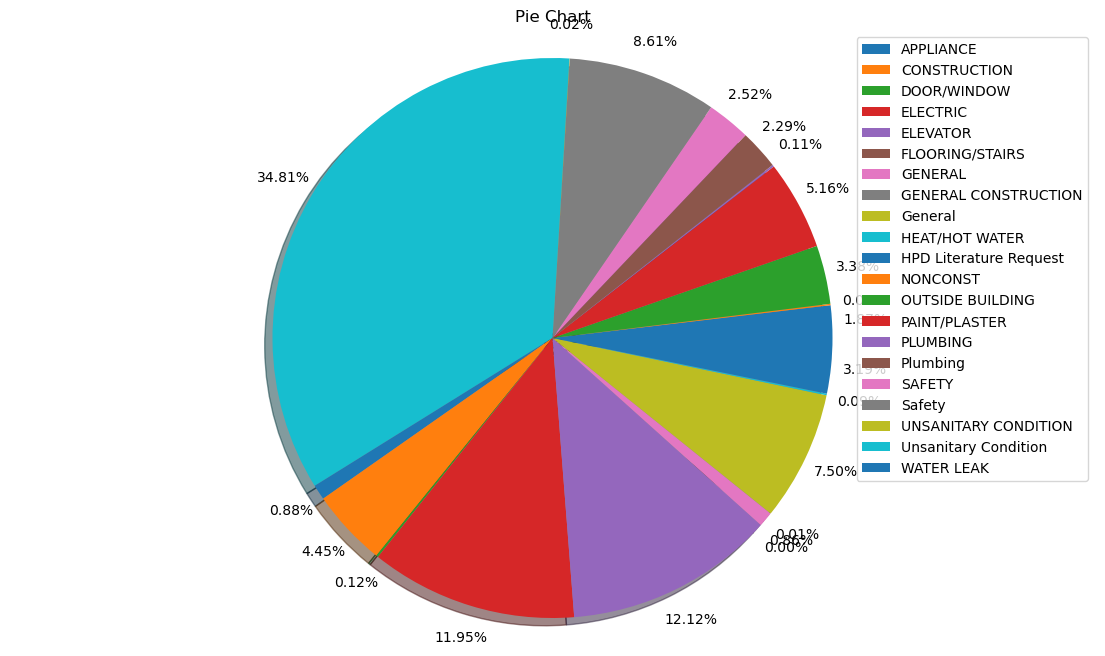

In [18]:

x_complaint = x.groupby('complaint_type')['complaint_type'].count()

plt.figure(figsize=(14,8))
plt.pie(x_complaint,autopct='%1.2f%%',
                 shadow=True,
                 labels=None,
                 pctdistance=1.12,
                 )

plt.title("Pie Chart")
plt.axis('equal')
plt.legend(labels=x_complaint.index, loc='best') 

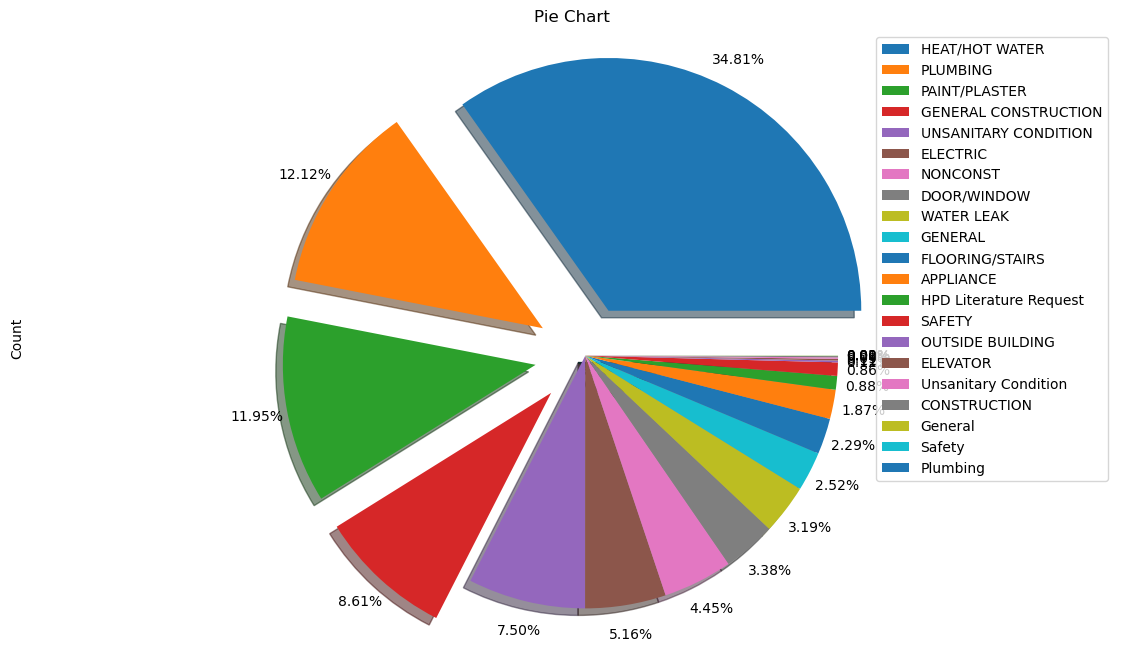

In [20]:
x_complaint = x['complaint_type'].value_counts()
x_complaint = pd.DataFrame(x_complaint)
x_complaint = x_complaint.reset_index()
x_complaint.columns = ['Complaint_type',"Count"]
x_complaint = x_complaint.set_index("Complaint_type")

explode_list = [0.2,0.2,0.2,0.2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
x_complaint['Count'].plot(kind="pie",
                 figsize=(14,8),
                 autopct='%1.2f%%',
                 shadow=True,
                 labels=None,
                 pctdistance=1.12,
                 explode=explode_list)


plt.title("Pie Chart")
plt.axis('equal')
plt.legend(labels=x_complaint.index, loc='best')

In [21]:
x_complaint

,Count
Complaint_type,
HEAT/HOT WATER,201904
PLUMBING,70302
PAINT/PLASTER,69302
GENERAL CONSTRUCTION,49926
UNSANITARY CONDITION,43494
ELECTRIC,29923
NONCONST,25782
DOOR/WINDOW,19629
WATER LEAK,18492


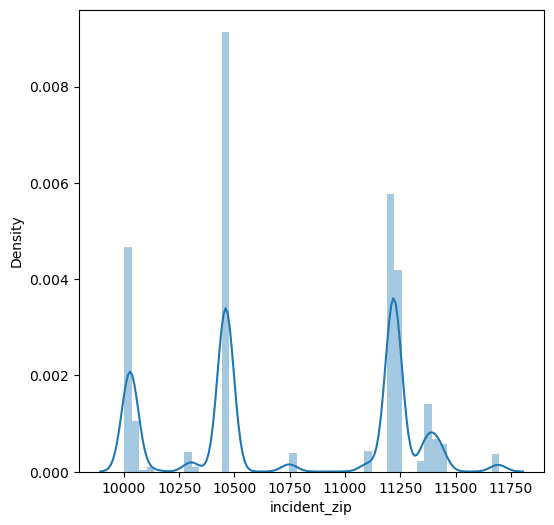

In [22]:
plt.figure(figsize=(6,6))
sns.distplot(x['incident_zip'])
plt.show()

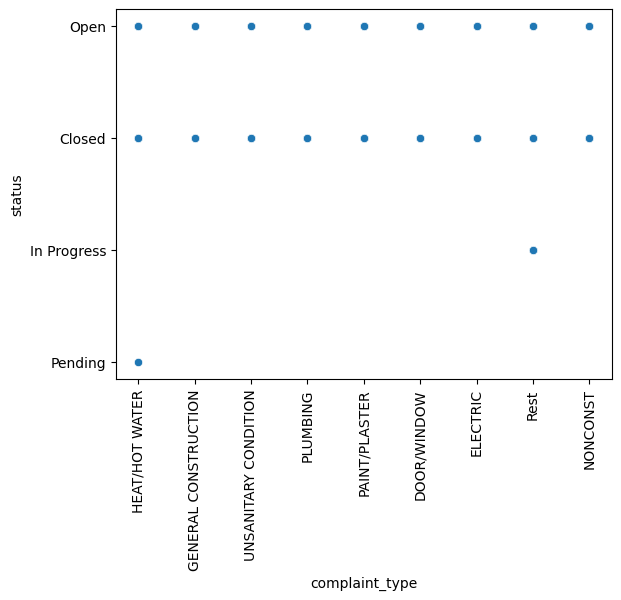

In [143]:
sns.scatterplot(x='complaint_type', y='status',data=x)
plt.xticks(rotation=90) 
plt.show()

# Question 1 : Answer
    Top 5 Complaint are as follows
    HEAT/HOT WATER          201904
    PLUMBING                 70302
    PAINT/PLASTER            69302
    GENERAL CONSTRUCTION     49926
    UNSANITARY CONDITION     43494

# Question 2: Identify the Top Complaint Type
    Which type of complaint should the Department of Housing Preservation and Development of New York City focus on first?

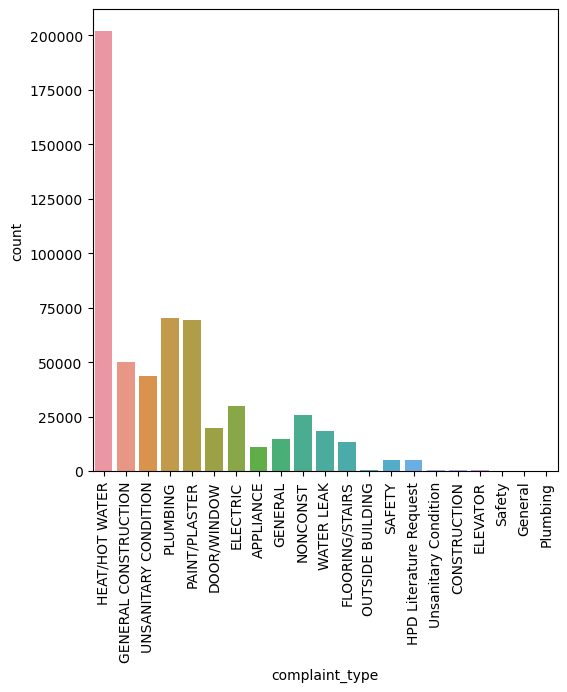

In [24]:
plt.figure(figsize=(6,6))
sns.countplot(x='complaint_type',data=x)
plt.xticks(rotation=90)
plt.show()

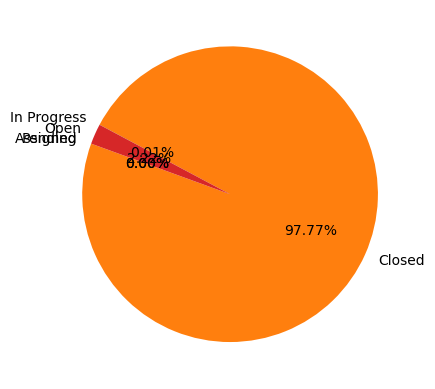

In [25]:
b=df.groupby("status")["status"].count()
plt.pie(b,labels=b.index,autopct="%.2f%%",startangle=160)
plt.show()

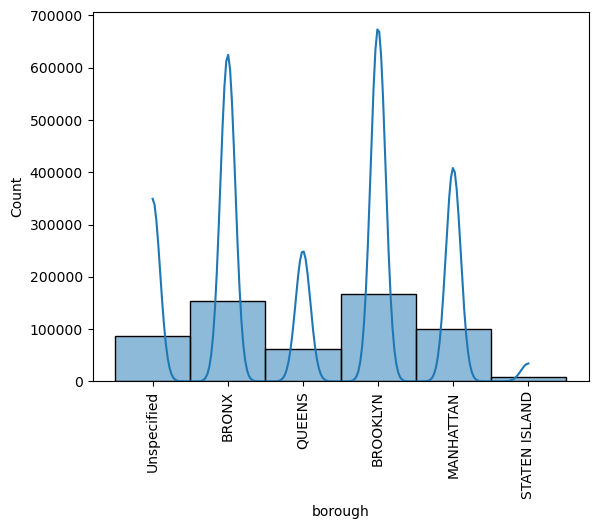

In [26]:
sns.histplot(x["borough"],bins=10,kde=True)
plt.xticks(rotation = 90)
plt.show()

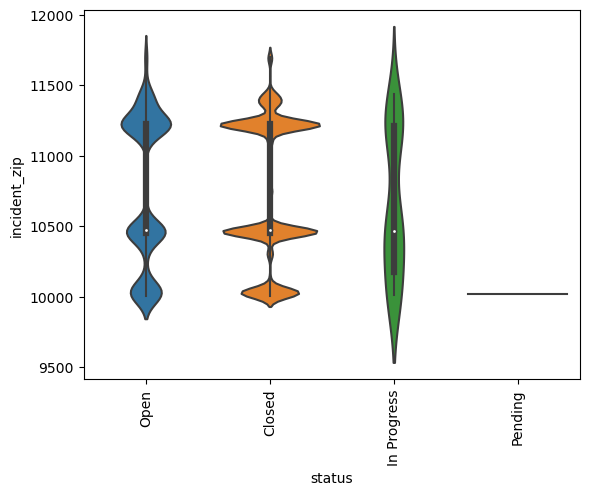

In [27]:
sns.violinplot(y="incident_zip",x="status",data=x)
plt.xticks(rotation=90)
plt.show()

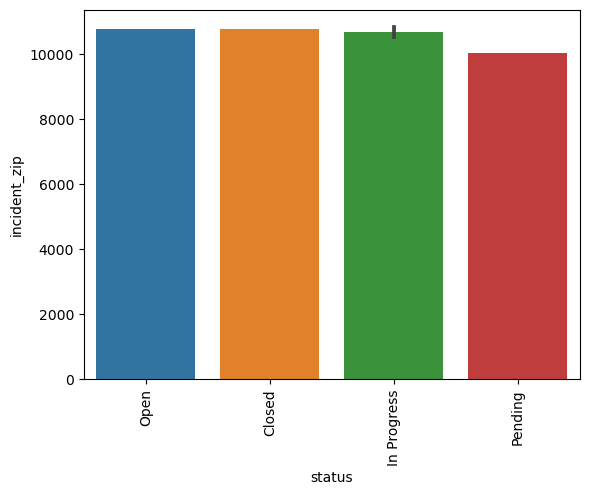

In [28]:
sns.barplot(y='incident_zip', x='status',data=x, orient='v')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='incident_zip', ylabel='Density'>

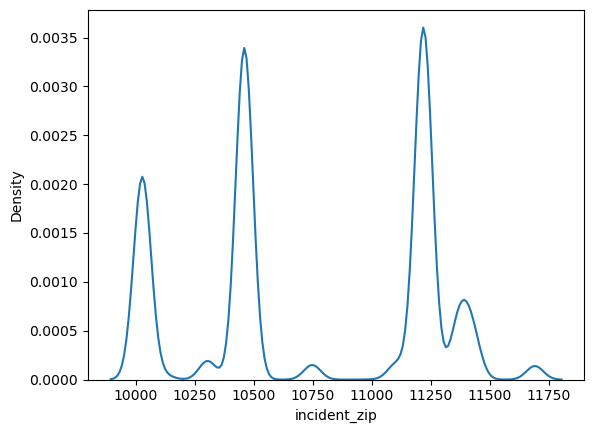

In [29]:
sns.kdeplot(x='incident_zip', data=x)

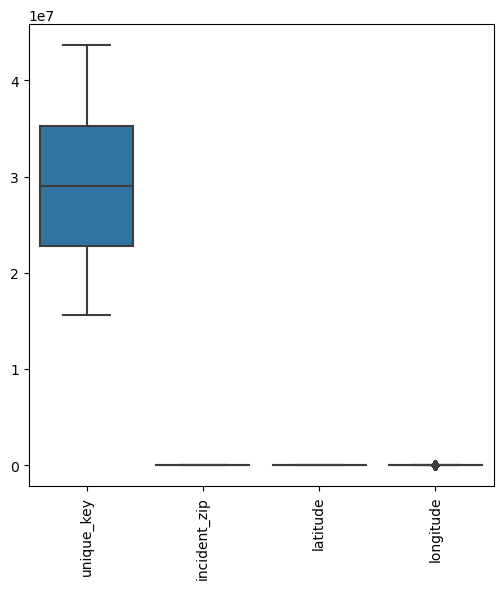

In [30]:
plt.figure(figsize=(6,6))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

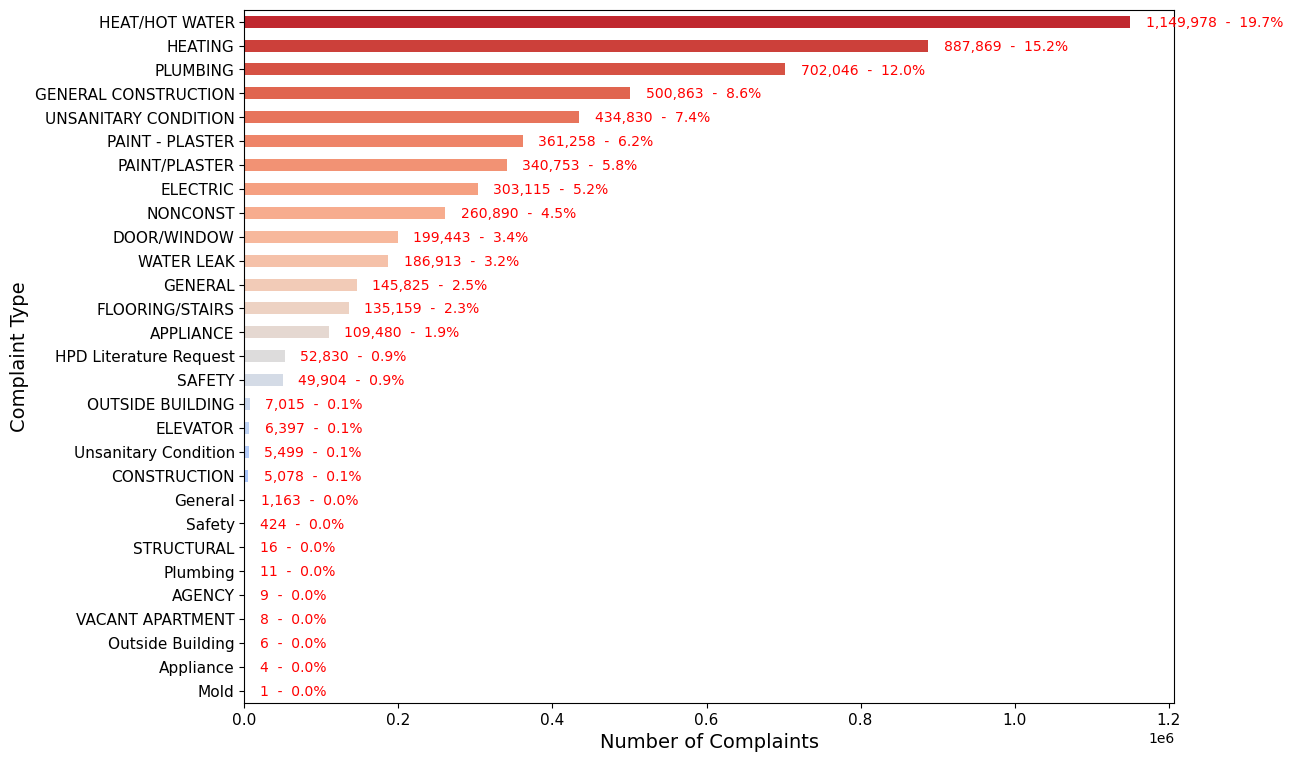

In [31]:
x1 = df.copy()

# find the name of the less common complaints and rename all corresponding rows
idx = x['complaint_type'].value_counts().sort_values().head(13).index
x.loc[x1['complaint_type'].isin(idx), 'complaint_type'] = 'Rest'

x_complaints = x1['complaint_type'].value_counts().sort_values()

x_complaints.plot(kind = 'barh', figsize = (12, 9), fontsize = 11, color = sns.color_palette('coolwarm', len(x_complaints)))
plt.ylabel('Complaint Type', fontsize = 14)
plt.xlabel('Number of Complaints', fontsize = 14)

# Includes the number of incidents and the corresponding percentage for every type
for index, value in enumerate(x_complaints):    
    label = str(format(int(value), ',')) + '  -  {}%'.format(round( (value/x_complaints.sum())*100, 1)) 
    plt.annotate(label, xy = (value + 20000, index - 0.2 ), color = 'red')

# Question 2 - Answer
        Based on the previous analysis, the Department of Housing Preservation and 
        Development of New York City should address the 'HEAT/HOT WATER' complaint first.

# Question 3: Identify Areas Most Affected by the Top Complaint Type?

In [32]:
x_tct = x[['borough', 'incident_zip', 'street_name', 'latitude', 'longitude', 'complaint_type']]
x_tct = x_tct[x_tct['complaint_type'] == 'HEAT/HOT WATER']

x_tct.head()

,borough,incident_zip,street_name,latitude,longitude,complaint_type
1064994,Unspecified,10469.0,BRUNER AVENUE,40.869769,-73.836746,HEAT/HOT WATER
3760427,BRONX,10463.0,WEST KINGSBRIDGE ROAD,40.871994,-73.904453,HEAT/HOT WATER
2554675,QUEENS,11103.0,35 STREET,40.766719,-73.917124,HEAT/HOT WATER
1484064,BROOKLYN,11225.0,FLATBUSH AVENUE,40.658725,-73.960505,HEAT/HOT WATER
4901528,BRONX,10458.0,VALENTINE AVENUE,40.857142,-73.898022,HEAT/HOT WATER


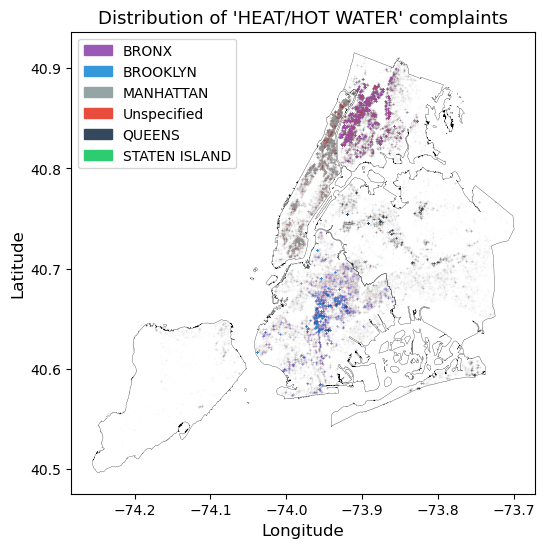

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
boroughs = list(x_tct['borough'].value_counts().index)
colors = ['#9b59b6', '#3498db', '#95a5a6', '#e74c3c', '#34495e', '#2ecc71']
patches = []

fig, ax = plt.subplots(figsize = (6, 6))

for index, value in enumerate(boroughs):
    borough_df = x_tct[x_tct['borough'] == value]
    ax.scatter(borough_df['longitude'], borough_df['latitude'], c = colors[index], s = 0.5, alpha = 0.01, marker = '.')
    patches.append(mpatches.Patch(label = value, color = colors[index]))
 
borough_map ['geometry'].boundary.plot(edgecolor = 'black', linewidth = 0.2, ax = ax)

plt.title("Distribution of 'HEAT/HOT WATER' complaints", size = 13)
plt.xlabel('Longitude', size = 12)
plt.ylabel('Latitude', size = 12)
plt.legend(patches, boroughs);

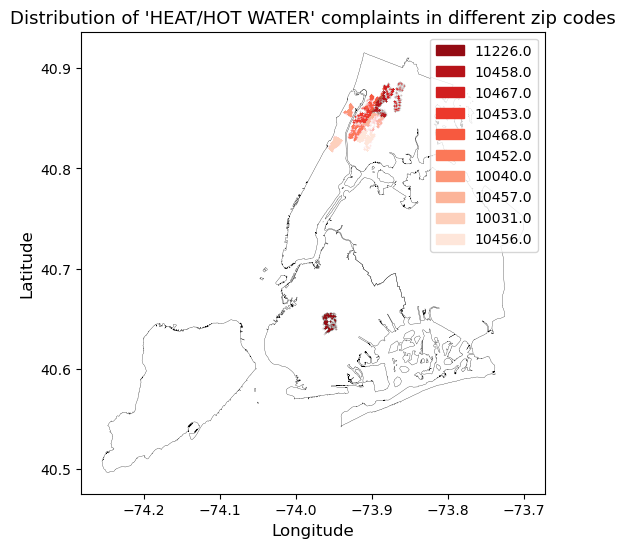

In [34]:
zip_codes = list(x_tct['incident_zip'].value_counts().head(10).index)
colors = sns.color_palette('Reds_r', len(zip_codes)).as_hex()
patches = []

fig, ax = plt.subplots(figsize = (6, 6))

for index, value in enumerate(zip_codes):
    zip_df = x_tct[x_tct['incident_zip'] == value]
    ax.scatter(zip_df['longitude'], zip_df['latitude'], c = colors[index], s = 1, alpha = 0.01, marker = '.')
    patches.append(mpatches.Patch(label = value, color = colors[index]))
    
borough_map['geometry'].boundary.plot(edgecolor = 'black', linewidth = 0.2, ax = ax)
    
plt.title("Distribution of 'HEAT/HOT WATER' complaints in different zip codes", size = 13)
plt.xlabel('Longitude', size = 12)
plt.ylabel('Latitude', size = 12)

plt.legend(patches, zip_codes);

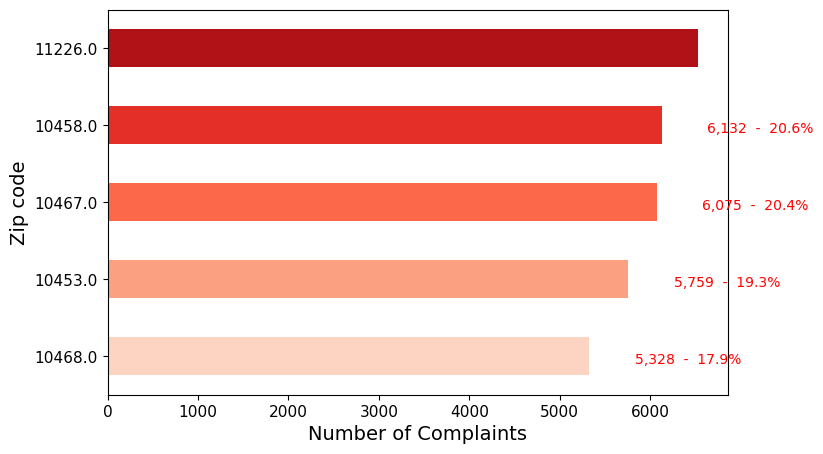

In [265]:
ny_zip = x_tct['incident_zip'].value_counts().head(5).sort_values()
ny_zip.index = ny_zip.index.map(str)
color = sns.color_palette('Reds', len(ny_zip))

ny_zip.plot(kind = 'barh', figsize = (8, 5), fontsize = 11, color = color)
plt.ylabel('Zip code', fontsize = 14)
plt.xlabel('Number of Complaints', fontsize = 14)

for index, value in enumerate(ny_zip):   
    label = str(format(int(value), ','))  + '  -  {}%'.format(round( (value/ny_zip.sum())*100, 1)) 
    plt.annotate(label, xy = (value + 500, index - 0.1), color = 'red')

In [36]:
print('11226 Zip code belongs to: ', x[x['incident_zip'] == 11226.0].head().iloc[0]['borough'])

11226 Zip code belongs to:  Unspecified


# Question 3 - Answer
        
        Based on the previous analysis the Zip code 11226 has the most no of complaints 
        as this Zip code belongs to BROOKLYN so BROOKLYN is the most affected area.

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder,StandardScaler


In [38]:
x1 = df.sample(5800)

In [67]:
x1.drop(['closed_date','created_date'], axis=1,inplace = True)

In [68]:
x1

,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,location_type,status
3601892,30708533,15,10454.0,2376,285,0,6,70,0,40.810519,-73.924789,0,0
2644572,26835563,10,11372.0,2927,234,0,32,81,3,40.752570,-73.887679,0,0
4150764,33154211,9,10032.0,4920,1432,0,42,73,2,40.833927,-73.940287,0,0
4266340,33987756,2,10033.0,947,1532,0,42,79,2,40.845138,-73.938361,0,0
5203669,38452878,16,10029.0,2073,643,0,42,71,2,40.796620,-73.939002,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3135204,29040165,20,10455.0,3617,1487,0,6,71,0,40.811426,-73.906762,0,0
804618,19170573,10,11205.0,1530,489,0,7,41,5,40.692252,-73.968649,0,0
1363761,21531473,14,11214.0,1671,248,0,7,79,1,40.604371,-73.996226,0,0
906122,19420129,10,11691.0,611,374,0,18,40,5,40.607748,-73.754264,0,0


In [78]:
x1['latitude'].fillna(x1['latitude'].mean(), inplace = True)
x1['longitude'].fillna(x1['longitude'].mean(), inplace = True)
x1['incident_zip'].fillna(x1['incident_zip'].mean(), inplace = True)

In [79]:
encoder = LabelEncoder()

In [80]:
q = ['incident_address','street_name','address_type','city','resolution_description','borough','location_type','status','complaint_type']

In [81]:
for i in q:
    x1[i]=encoder.fit_transform(x1[i])

In [82]:
numerical_cols=['incident_zip','latitude','longitude',]
scaler=StandardScaler()
scaled_cols=pd.DataFrame(scaler.fit_transform(x1[numerical_cols]),columns=scaler.get_feature_names_out(numerical_cols))

In [83]:
X = x1.drop('status',axis=1)
Y = x1['status']
print(x1)

         unique_key  complaint_type  incident_zip  incident_address  \
3601892    30708533              15       10454.0              2376   
2644572    26835563              10       11372.0              2927   
4150764    33154211               9       10032.0              4920   
4266340    33987756               2       10033.0               947   
5203669    38452878              16       10029.0              2073   
...             ...             ...           ...               ...   
3135204    29040165              20       10455.0              3617   
804618     19170573              10       11205.0              1530   
1363761    21531473              14       11214.0              1671   
906122     19420129              10       11691.0               611   
3742474    31599207               9       10462.0               739   

         street_name  address_type  city  resolution_description  borough  \
3601892          285             0     6                      70      

In [84]:
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=42)

In [85]:
log = LogisticRegression()

In [86]:
#Training the model
log.fit(X_train, Y_train)

LogisticRegression()

In [88]:
print ('Train Score:',log.score(X_train,Y_train))

Train Score: 0.9788793103448276


In [89]:
print ('Test Score:',log.score(X_test,Y_test))

Test Score: 0.9775862068965517


In [90]:
pred_train = log.predict(X_train)
pred_test = log.predict(X_test)

In [91]:
from sklearn import metrics
print(metrics.classification_report(Y_train,pred_train))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4542
           1       0.00      0.00      0.00         1
           2       0.00      0.00      0.00        97

    accuracy                           0.98      4640
   macro avg       0.33      0.33      0.33      4640
weighted avg       0.96      0.98      0.97      4640



In [254]:
#Calculating accuracy and f1 score of the logistic model
LR_acc = accuracy_score(Y_test, pred_test)
LR_f1 = f1_score(Y_test, pred_test, average='weighted')

In [255]:
print('Logistic Regression accuracy: ',LR_acc)
print('Logistic Regression f1 score: ',LR_f1)

Logistic Regression accuracy:  0.9775862068965517
Logistic Regression f1 score:  0.9665063283528245


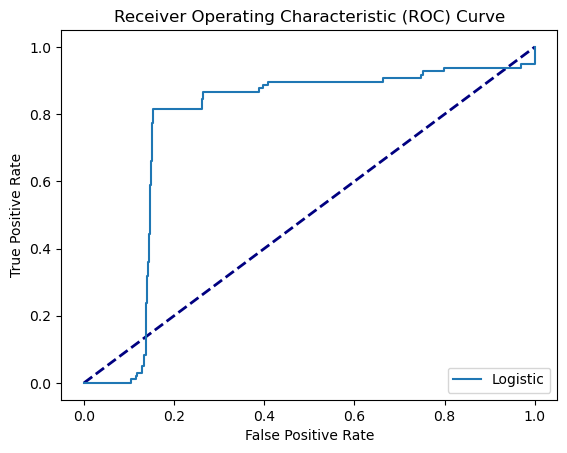

In [92]:
roc=log.predict_proba(X_train)[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_train,roc, pos_label=2)
plt.plot([0,1], [0,1],'k--', color='navy', lw=2) 
plt.plot(fpr,tpr,label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Logistic Regression - Grid Search

In [93]:
# Defining hyperparameters and their possible values for tuning
param_grid = {
    'penalty' : ['l1', 'l2'],#l1 lasso l2 Ridge
    'C' : [0.1, 0.5, 1, 5, 10]
}

In [94]:
# Creating a GridSearchCV object
grid = GridSearchCV(estimator=log, param_grid=param_grid, cv=5)

In [95]:
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10], 'penalty': ['l1', 'l2']})

In [96]:
# Getting the best hyperparameters
best_param_lr_gs = grid.best_params_

# Getting the best model
best_model_lr_gs = grid.best_estimator_

In [97]:
print('Best hyperparameters: ',best_param_lr_gs)


Best hyperparameters:  {'C': 0.1, 'penalty': 'l2'}


In [98]:
Y_pred_lr_gs = best_model_lr_gs.predict(X_test)

In [99]:
LR_GS_acc = accuracy_score(Y_test, Y_pred_lr_gs)
pre = precision_score(Y_test, Y_pred_lr_gs, average='weighted')  # Fix: Set average to 'weighted'
rec = recall_score(Y_test, Y_pred_lr_gs, average='weighted')  # Fix: Set average to 'weighted'
LR_GS_f1 = f1_score(Y_test, Y_pred_lr_gs, average='weighted')  # Fix: Set average to 'weighted'


In [100]:
print('Accuracy of Logistic regression after grid search : ', LR_GS_acc) #Accuracy is the proportion of correct predictions over total predictions. 
print('Precision of Logistic regression after grid search : ', pre)      #Precision measures how good our model is when the prediction is positive. 
print("Recall of Logistic regression after grid search : ", rec)         #Recall measures how good our model is at correctly predicting positive classes.
print('Fl Score of Logistic regression after grid search : ', LR_GS_f1)

Accuracy of Logistic regression after grid search :  0.9775862068965517
Precision of Logistic regression after grid search :  0.9556747919143876
Recall of Logistic regression after grid search :  0.9775862068965517
Fl Score of Logistic regression after grid search :  0.9665063283528245


In [101]:
#Confusion Matrix after Grid Search
cm_gs = confusion_matrix(Y_test, Y_pred_lr_gs)
print('Confusion Matrix:')
print(cm_gs)
print('True Positives(TP) = ', cm_gs[0,0])
print('True Negatives(TN) = ', cm_gs[1,1])
print('False Positives(FP) = ', cm_gs[0,1])
print('False Negatives(FN) = ', cm_gs[1,0])

Confusion Matrix:
[[1134    0]
 [  26    0]]
True Positives(TP) =  1134
True Negatives(TN) =  0
False Positives(FP) =  0
False Negatives(FN) =  26


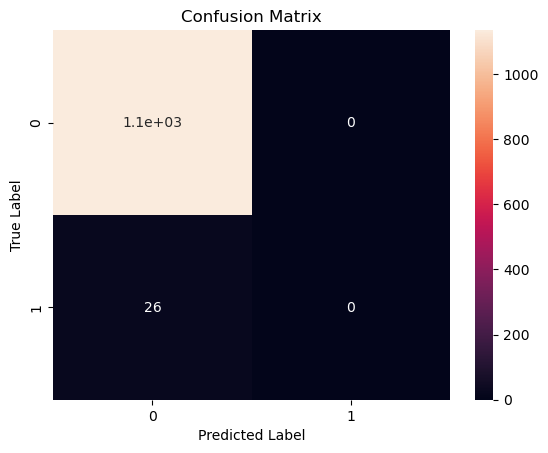

In [102]:
#Heatmap after grid search
sns.heatmap(cm_gs, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [103]:
#Classification report after Grid Search
classification_rep = classification_report(Y_test, Y_pred_lr_gs)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1134
           2       0.00      0.00      0.00        26

    accuracy                           0.98      1160
   macro avg       0.49      0.50      0.49      1160
weighted avg       0.96      0.98      0.97      1160



# Logistic Regression - Randomized Search

In [104]:
# Defining hyperparameters and their possible values for tuning
from scipy.stats import uniform

param_dist = {
    'penalty': ['l1', 'l2'],
    'C': uniform(loc=0, scale=4)  # Random values between 0 and 4 for regularization strength (C)
}

In [105]:
# Creating a RandomizedSearchCV object
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
random_search = RandomizedSearchCV(log, param_distributions=param_dist, n_iter=100, cv=5, random_state=42, n_jobs=-1)

In [106]:
# Fitting the RandomizedSearchCV object to the training data
random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001454C563A10>,
                                        'penalty': ['l1', 'l2']},
                   random_state=42)

In [107]:
# Getting the best hyperparameters
best_param_lr_rs = random_search.best_params_

In [108]:
# Getting the best model
best_model_lr_rs = random_search.best_estimator_

In [109]:
# Making predictions on the test set
Y_pred_lr_rs = best_model_lr_rs.predict(X_test)

In [110]:
print('Best Param of randomized regression after grid search :  ', best_param_lr_rs)


Best Param of randomized regression after grid search :   {'C': 0.7337391594646552, 'penalty': 'l2'}


In [111]:
# Evaluating the best model
pre = precision_score(Y_test, Y_pred_lr_rs,average='micro')
rec = recall_score(Y_test, Y_pred_lr_rs, average='micro')  
LR_RS_acc = accuracy_score(Y_test, Y_pred_lr_rs)
LR_RS_f1 = f1_score(Y_test, Y_pred_lr_rs, average='micro')


In [112]:
print('Accuracy of randomized regression after grid search : ', LR_RS_acc)
print('Precision of randomized regression after grid search : ', pre)
print("Recall of randomized regression after grid search : ", rec)
print('Fl Score of randomized regression after grid search : ', LR_RS_f1)


Accuracy of randomized regression after grid search :  0.9775862068965517
Precision of randomized regression after grid search :  0.9775862068965517
Recall of randomized regression after grid search :  0.9775862068965517
Fl Score of randomized regression after grid search :  0.9775862068965517


In [113]:
#Confusion Matrix after Randomized Search
cm_rs = confusion_matrix(Y_test, Y_pred_lr_rs)
print('Confusion Matrix:')
print(cm_rs)
print('True Positives(TP) = ', cm_rs[0,0])
print('True Negatives(TN) = ', cm_rs[1,1])
print('False Positives(FP) = ', cm_rs[0,1])
print('False Negatives(FN) = ', cm_rs[1,0])

Confusion Matrix:
[[1134    0]
 [  26    0]]
True Positives(TP) =  1134
True Negatives(TN) =  0
False Positives(FP) =  0
False Negatives(FN) =  26


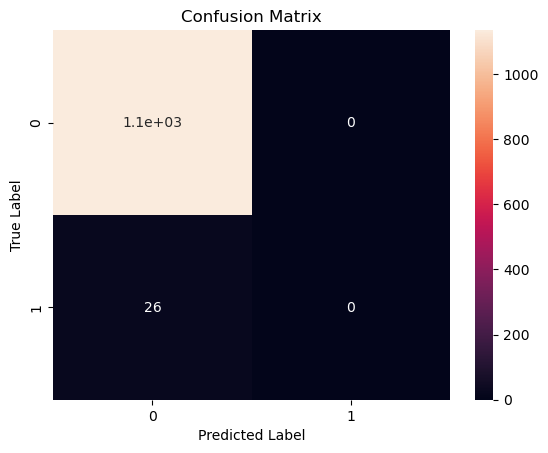

In [114]:
#Heatmap after Randomized Search
sns.heatmap(cm_rs, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [115]:
#Classification report after Randomized Search
classification_rep = classification_report(Y_test, Y_pred_lr_rs)
print('Classification Report:')
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1134
           2       0.00      0.00      0.00        26

    accuracy                           0.98      1160
   macro avg       0.49      0.50      0.49      1160
weighted avg       0.96      0.98      0.97      1160



# KNN = K Nearest Neighbor

In [117]:
# creating k-nearest neighbors classifier (knn) with the number of neighbors set to 10
knn = KNeighborsClassifier(n_neighbors=10)

#Training the model
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=10)

In [118]:
# accuracy score of a k-nearest neighbors classifier (knn) on the test data
knn.score(X_test,Y_test)

0.9793103448275862

In [119]:
#Making prediction on test set
Y_pred_knn= knn.predict(X_test)

In [120]:
#Accuracy of KNN model
KNN_acc = accuracy_score(Y_test, Y_pred_knn)
print("Accuracy Score : {:.2f}%". format(KNN_acc*100))

Accuracy Score : 97.93%


In [121]:
# F1 score of KNN model
KNN_f1 = f1_score(Y_test, Y_pred_knn, average='weighted')
print("F1 Score : {:.2f}%". format(KNN_f1*100))

F1 Score : 97.39%


In [122]:
#Classification report of KNN model
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1134
           2       0.62      0.19      0.29        26

    accuracy                           0.98      1160
   macro avg       0.80      0.59      0.64      1160
weighted avg       0.97      0.98      0.97      1160



In [123]:
#Confusion Matrix of KNN model
cm=confusion_matrix(Y_test, Y_pred_knn)
print('Confusion matrix : ')
print(cm)
print('True Positives(TP) = ', cm[0,0])
print('True Negatives(TN) = ', cm[1,1])
print('False Positives(FP) = ', cm[0,1])
print('False Negatives(FN) = ', cm[1,0])

Confusion matrix : 
[[1131    3]
 [  21    5]]
True Positives(TP) =  1131
True Negatives(TN) =  5
False Positives(FP) =  3
False Negatives(FN) =  21


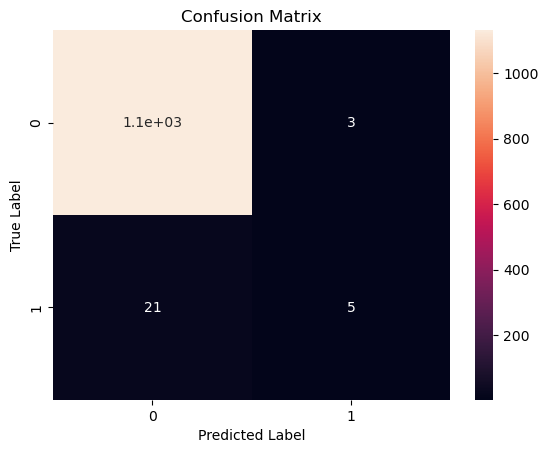

In [124]:
#Heatmap of KNN model
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

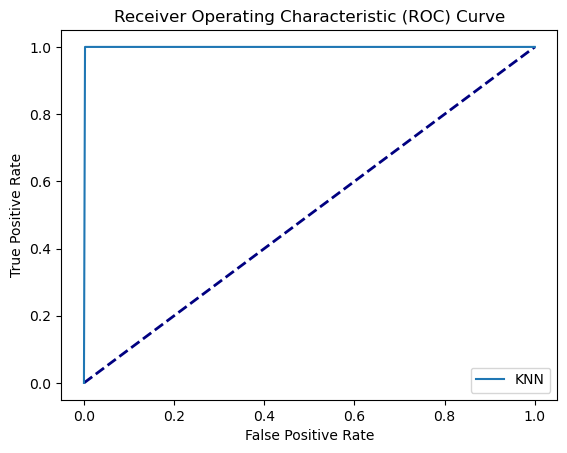

In [125]:
#AUC-ROC curve is plotted 

roc=knn.predict_proba(X_train)[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_train,roc, pos_label=1)
plt.plot([0,1], [0,1],'k--', color='navy', lw=2) 
plt.plot(fpr,tpr,label='KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# KNN - Grid Search

In [126]:
#Defining hyper parameter
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],  # Test different values of k
    'weights': ['uniform', 'distance'],  # Weighting type
    'p': [1, 2],  # Distance metric (1 for Manhattan, 2 for Euclidean)
}

In [127]:
knn_gs = KNeighborsClassifier()            # Create a k-nearest neighbors classifier instance
grid_search_knn = GridSearchCV(knn_gs, param_grid_knn, cv=5,scoring='accuracy')               # Perform grid search with cross-validation
grid_search_knn.fit(X_train, Y_train)      # Fit the grid search to the training data

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [128]:
best_param_knn = grid_search_knn.best_params_           #best hyperparameters from the grid search results
best_knn_gs = KNeighborsClassifier(n_neighbors = best_param_knn['n_neighbors'], weights = best_param_knn['weights'],p=best_param_knn['p'])    #new k-nearest neighbors classifier is created with the optimal hyperparameters obtained from the grid search
best_knn_gs.fit(X_train, Y_train)            #fits the newly created k-nearest neighbors classifier to the training data          
Y_pred_knn_gs = best_knn_gs.predict(X_test)             #optimized k-nearest neighbors classifier is used to make predictions on the test data

In [129]:
print("Best Hyperparameter : ", best_param_knn)

Best Hyperparameter :  {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


In [130]:
#Accuracy of KNN model after grid search
KNN_GS_acc = accuracy_score(Y_test, Y_pred_knn_gs)
print("Accuracy Score after Grid Search : {:.2f}%". format(KNN_GS_acc*100))

Accuracy Score after Grid Search : 97.50%


In [131]:
#Classificaton report of KNN model after grid search
print (classification_report(Y_test, Y_pred_knn_gs))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1134
           2       0.43      0.35      0.38        26

    accuracy                           0.97      1160
   macro avg       0.71      0.67      0.69      1160
weighted avg       0.97      0.97      0.97      1160



In [132]:
#Confusion matrix of KNN model after grid search
cm_knn_gs=confusion_matrix(Y_test, Y_pred_knn_gs)
print('Confusion matrix : ')
print(cm_knn_gs)
print('True Positives(TP) = ', cm_knn_gs[0,0])
print('True Negatives(TN) = ', cm_knn_gs[1,1])
print('False Positives(FP) = ', cm_knn_gs[0,1])
print('False Negatives(FN) = ', cm_knn_gs[1,0])

Confusion matrix : 
[[1122   12]
 [  17    9]]
True Positives(TP) =  1122
True Negatives(TN) =  9
False Positives(FP) =  12
False Negatives(FN) =  17


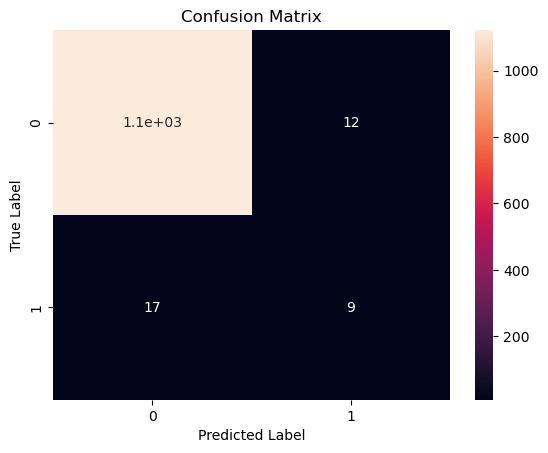

In [133]:
#Heatmap of KNN model after grid search
sns.heatmap(cm_knn_gs, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [134]:
cross_val_scores = cross_val_score(best_knn_gs, X, Y, cv=5, scoring='accuracy')
mean_accuracy = cross_val_scores.mean()        # mean accuracy is calculated by taking the mean of the cross-validated accuracy scores
print("Cross-Validation Mean Accuracy : {:.2f}%". format(mean_accuracy*100))

Cross-Validation Mean Accuracy : 97.79%


# KNN - Choosing the right k

In [144]:
# Define a range of k values to explore
k_values = list(range(1, 21))  # Explore k values from 1 to 20

In [145]:
# Initialize lists to store mean accuracy for each k
mean_accuracies = []

In [146]:
# Iterate through different k values
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Perform cross-validation with k neighbors
    scores = cross_val_score(knn, X, Y, cv=5, scoring='accuracy')
    mean_accuracy = np.mean(scores)
    mean_accuracies.append(mean_accuracy)

In [147]:
# Find the optimal k
optimal_k = k_values[mean_accuracies.index(max(mean_accuracies))]

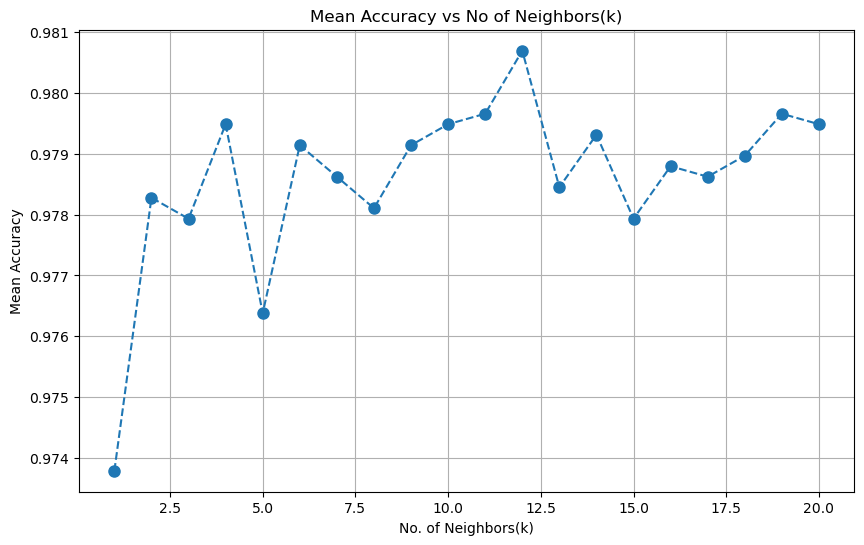

In [148]:
# Plot the mean accuracy for each k
plt.figure(figsize=(10, 6))
plt.plot(k_values, mean_accuracies, marker='o', linestyle='dashed', markersize=8)
plt.title("Mean Accuracy vs No of Neighbors(k)")
plt.xlabel("No. of Neighbors(k)")
plt.ylabel("Mean Accuracy")
plt.grid()
plt.show()

In [149]:
#Print the optimal k
print("Optimal k : ", optimal_k)

Optimal k :  12


# KNN - Euclidean

In [150]:
#Creates a k-nearest neighbors classifier with 10 neighbors and Euclidean distance metric.
knn_classifier = KNeighborsClassifier(n_neighbors=10, metric='euclidean')

In [151]:
#Training the model
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [152]:
#Making prediction on test set
Y_pred_knn_e = knn_classifier.predict(X_test)

In [153]:
#accuracy of knn model 
KNN_E_acc = accuracy_score(Y_test, Y_pred_knn_e)  # For classification
print("Accuracy Score after Euclidean Method : {:.2f}%". format(KNN_E_acc*100))

Accuracy Score after Euclidean Method : 97.93%


In [164]:
#classification_report of KNN model
print(classification_report(Y_test, Y_pred_knn_e))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1134
           2       0.62      0.19      0.29        26

    accuracy                           0.98      1160
   macro avg       0.80      0.59      0.64      1160
weighted avg       0.97      0.98      0.97      1160



In [165]:
#Confusion matrix of KNN model
cm_knn_e=confusion_matrix(Y_test, Y_pred_knn_e)
print('Confusion matrix : ')
print(cm_knn_e)
print('True Positives(TP) = ', cm_knn_e[0,0])
print('True Negatives(TN) = ', cm_knn_e[1,1])
print('False Positives(FP) = ', cm_knn_e[0,1])
print('False Negatives(FN) = ', cm_knn_e[1,0])

Confusion matrix : 
[[1131    3]
 [  21    5]]
True Positives(TP) =  1131
True Negatives(TN) =  5
False Positives(FP) =  3
False Negatives(FN) =  21


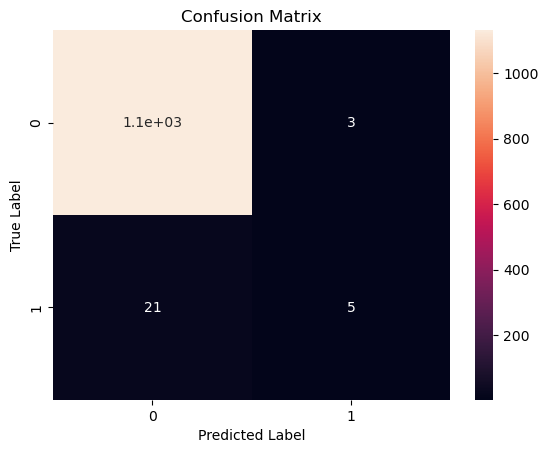

In [166]:
#Heatmap of KNN model
sns.heatmap(cm_knn_e, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# KNN - Manhatan

In [167]:
#Creates a k-nearest neighbors classifier with 10 neighbors and Manhatan distance metric
knn_classifier = KNeighborsClassifier(n_neighbors=10, metric='manhattan')

In [168]:
#Training the model
knn_classifier.fit(X_train, Y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=10)

In [169]:
#Making pedictions on the test set
Y_pred_knn_m = knn_classifier.predict(X_test)

In [170]:
#Accuracy of the KNN model
KNN_M_acc = accuracy_score(Y_test, Y_pred_knn_m) 
print("Accuracy Score after Manhatan Distance Method : {:.2f}%". format(KNN_M_acc*100))

Accuracy Score after Manhatan Distance Method : 97.84%


In [172]:
#Classification report of the KNN model
print(classification_report(Y_test, Y_pred_knn_m))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1134
           2       0.56      0.19      0.29        26

    accuracy                           0.98      1160
   macro avg       0.77      0.59      0.64      1160
weighted avg       0.97      0.98      0.97      1160



In [173]:
#Confusion matrix of the KNN model
cm_knn_m=confusion_matrix(Y_test, Y_pred_knn_m)
print('Confusion matrix : ')
print(cm_knn_m)
print('True Positives(TP) = ', cm_knn_m[0,0])
print('True Negatives(TN) = ', cm_knn_m[1,1])
print('False Positives(FP) = ', cm_knn_m[0,1])
print('False Negatives(FN) = ', cm_knn_m[1,0])

Confusion matrix : 
[[1130    4]
 [  21    5]]
True Positives(TP) =  1130
True Negatives(TN) =  5
False Positives(FP) =  4
False Negatives(FN) =  21


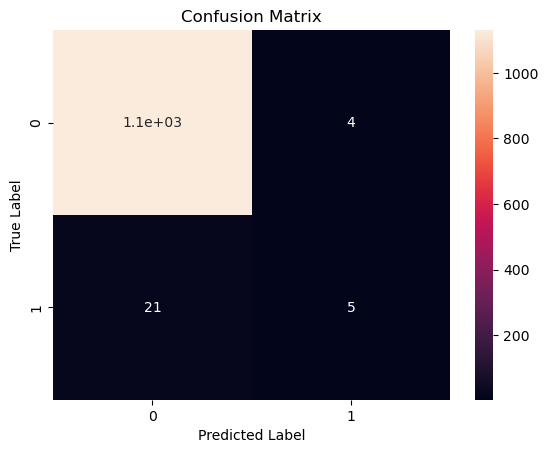

In [174]:
#Heatmap of the KNN model
sns.heatmap(cm_knn_m, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Decision Tree

In [175]:
from sklearn.tree import DecisionTreeClassifier
#Instantiates a Decision Tree classifier (classi) with a random state set to 10.
classi = DecisionTreeClassifier(random_state=10)

In [176]:
#Training the model
classi.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=10)

In [177]:
#Making prediction on the test data
Y_pred_dt = classi.predict(X_test)

In [178]:
#Accuracy of Decision Tree
DT_acc = accuracy_score(Y_test, Y_pred_dt)
print("Accuracy : {:.2f}%". format(DT_acc*100))

Accuracy : 99.05%


In [179]:
#Classification report of Decision Tree
print("Classification Report")
print(classification_report(Y_test, Y_pred_dt))

Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1134
           2       0.78      0.81      0.79        26

    accuracy                           0.99      1160
   macro avg       0.89      0.90      0.89      1160
weighted avg       0.99      0.99      0.99      1160



In [180]:
#Confusion Matrix of Decision Tree
cm_dt = confusion_matrix(Y_test, Y_pred_dt)
print('Confusion matrix : ')
print(cm_dt)
print('True Positives(TP) = ', cm_dt[0,0])
print('True Negatives(TN) = ', cm_dt[1,1])
print('False Positives(FP) = ', cm_dt[0,1])
print('False Negatives(FN) = ', cm_dt[1,0])

Confusion matrix : 
[[1128    6]
 [   5   21]]
True Positives(TP) =  1128
True Negatives(TN) =  21
False Positives(FP) =  6
False Negatives(FN) =  5


<Axes: >

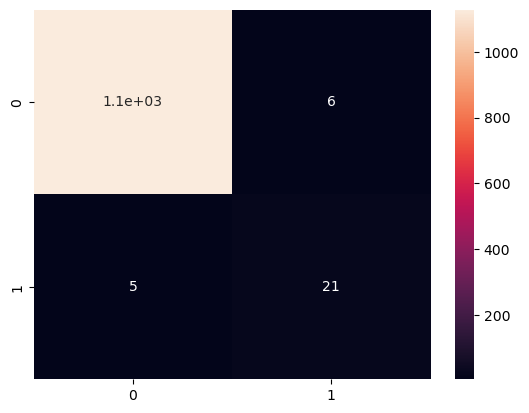

In [181]:
#Heatmap of Decision Tree
sns.heatmap(cm_dt, annot=True)

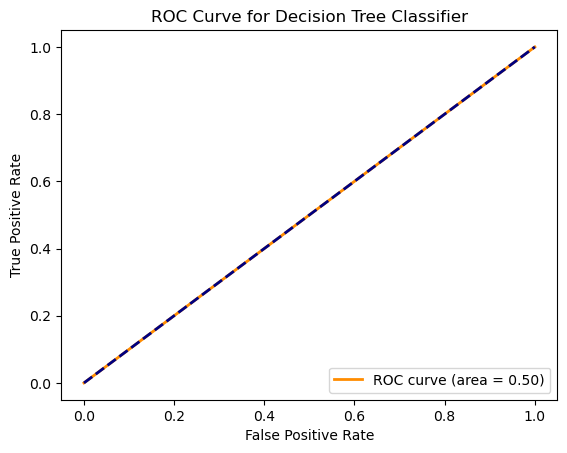

In [182]:
# Get predicted probabilities for the positive class (class 1)
roc = classi.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(Y_test, roc, pos_label=2)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

# Decision Tree - Grid Search

In [183]:
# Define the hyperparameters and their possible values
param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [184]:
# Create a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier()

In [185]:
# Create the GridSearchCV object
grid_search_dt = GridSearchCV(dt_classifier, param_grid_dt, cv=5, scoring='accuracy')

In [186]:
# Fit the grid search to the data
grid_search_dt.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [187]:
# Print the best hyperparameters
best_param_dt = grid_search_dt.best_params_
print("Best hyperparameter : ", best_param_dt)

Best hyperparameter :  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}


In [188]:
#Creates a Decision Tree classifier (best_dt) with specific hyperparameters obtained from a grid search
best_dt = DecisionTreeClassifier(criterion=best_param_dt['criterion'], max_depth=best_param_dt['max_depth'], min_samples_split=best_param_dt['min_samples_split'], min_samples_leaf=best_param_dt['min_samples_leaf'])

In [189]:
#Creates a Decision Tree classifier (best_dt) with specific hyperparameters obtained from a grid search
best_dt = DecisionTreeClassifier(criterion=best_param_dt['criterion'], max_depth=best_param_dt['max_depth'], min_samples_split=best_param_dt['min_samples_split'], min_samples_leaf=best_param_dt['min_samples_leaf'])

In [190]:
#Fits the Decision Tree classifier (best_dt) to the training data using the previously determined best hyperparameters.
best_dt.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [191]:
#Making prediction on the test data
Y_pred_dt_gs = best_dt.predict(X_test)

In [192]:
#Accuracy of Decision Tree after grid search
DT_GS_acc = accuracy_score(Y_test, Y_pred_dt_gs)
print("Accuracy after Grid Search : {:.2f}%". format(DT_GS_acc * 100))

Accuracy after Grid Search : 99.48%


In [193]:
#Classification report of Decision Tree after grid search
print("Classification Report")
print(classification_report(Y_test, Y_pred_dt_gs))

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1134
           2       1.00      0.77      0.87        26

    accuracy                           0.99      1160
   macro avg       1.00      0.88      0.93      1160
weighted avg       0.99      0.99      0.99      1160



In [194]:
#Confusion matrix of Decision Tree after grid search
cm_dt_gs = confusion_matrix(Y_test, Y_pred_dt_gs)
print('Confusion matrix : ')
print(cm_dt_gs)
print('True Positives(TP) = ', cm_dt_gs[0,0])
print('True Negatives(TN) = ', cm_dt_gs[1,1])
print('False Positives(FP) = ', cm_dt_gs[0,1])
print('False Negatives(FN) = ', cm_dt_gs[1,0])

Confusion matrix : 
[[1134    0]
 [   6   20]]
True Positives(TP) =  1134
True Negatives(TN) =  20
False Positives(FP) =  0
False Negatives(FN) =  6


<Axes: >

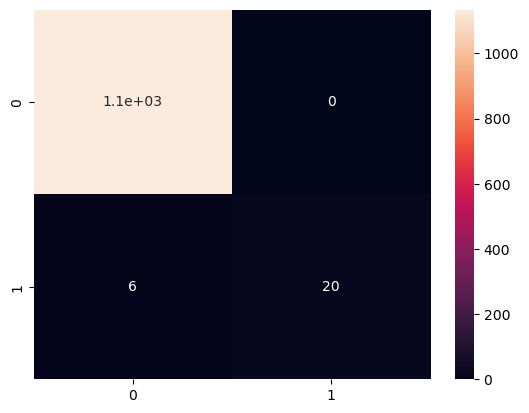

In [195]:
#Heatmap of Decision Tree after grid search
sns.heatmap(cm_dt_gs, annot=True)

# Decision Tree - Randomized Search

In [197]:
# Define the hyperparameters and their possible values
param_dist_dt_rs = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [198]:
# Create a Decision Tree Classifier
dt_classifier_rs = DecisionTreeClassifier()

In [199]:
# Create the RandomizedSearchCV object
randomized_search_dt = RandomizedSearchCV(
    dt_classifier_rs, param_distributions=param_dist_dt_rs, n_iter=10, cv=5, scoring='accuracy', random_state=42
)

In [200]:
# Fit the randomized search to the data
randomized_search_dt.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 15],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10]},
                   random_state=42, scoring='accuracy')

In [201]:
# Print the best hyperparameters
best_param_dt_rs = randomized_search_dt.best_params_
print("Best hyperparameter : ", best_param_dt_rs)

Best hyperparameter :  {'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'criterion': 'gini'}


In [202]:
#Creates a Decision Tree classifier (best_dt) with specific hyperparameters obtained from a randomized search
best_dt_rs = DecisionTreeClassifier(criterion=best_param_dt_rs['criterion'], max_depth=best_param_dt_rs['max_depth'], min_samples_split=best_param_dt_rs['min_samples_split'], min_samples_leaf=best_param_dt_rs['min_samples_leaf'])

In [203]:
#Fits the Decision Tree classifier (best_dt_rs) to the training data (X_train, Y_train) using the previously determined best hyperparameters.
best_dt_rs.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=5)

In [204]:
#Making prediction on the test data
Y_pred_dt_rs = best_dt_rs.predict(X_test)

In [205]:
#Accuracy of Decision Tree after randomized search
DT_RS_acc = accuracy_score(Y_test, Y_pred_dt_rs)
print("Accuracy after Grid Search : {:.2f}%". format(DT_RS_acc * 100))

Accuracy after Grid Search : 99.48%


In [207]:
#Classification report of Decision Tree after randomized search
print("Classification Report")
print(classification_report(Y_test, Y_pred_dt_rs))

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1134
           2       1.00      0.77      0.87        26

    accuracy                           0.99      1160
   macro avg       1.00      0.88      0.93      1160
weighted avg       0.99      0.99      0.99      1160



In [208]:
#Confusion matrix of Decision Tree after randomized search
cm_dt_rs = confusion_matrix(Y_test, Y_pred_dt_rs)
print('Confusion matrix : ')
print(cm_dt_rs)
print('True Positives(TP) = ', cm_dt_rs[0,0])
print('True Negatives(TN) = ', cm_dt_rs[1,1])
print('False Positives(FP) = ', cm_dt_rs[0,1])
print('False Negatives(FN) = ', cm_dt_rs[1,0])

Confusion matrix : 
[[1134    0]
 [   6   20]]
True Positives(TP) =  1134
True Negatives(TN) =  20
False Positives(FP) =  0
False Negatives(FN) =  6


<Axes: >

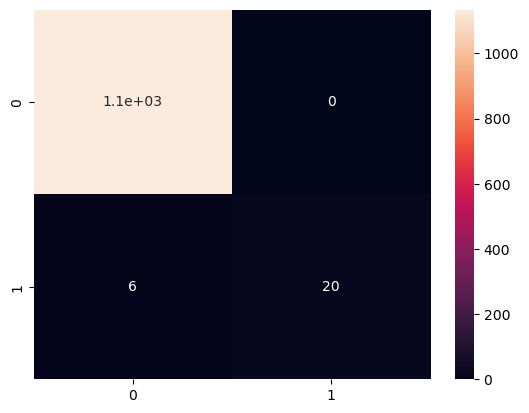

In [209]:
#Heatmap of Decision Tree after randomized search
sns.heatmap(cm_dt_rs, annot=True)

In [135]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

for i in range(1,15):
    Tree = DecisionTreeClassifier(criterion="entropy", max_depth = i)
    Tree # it shows the default parameters
    Tree.fit(X_train, Y_train)
    predTree = Tree.predict(X_test)
    print("DecisionTrees's Accuracy: ", metrics.accuracy_score(Y_test, predTree),"When max depth is: ",i)

DecisionTrees's Accuracy:  0.9775862068965517 When max depth is:  1
DecisionTrees's Accuracy:  0.9862068965517241 When max depth is:  2
DecisionTrees's Accuracy:  0.9896551724137931 When max depth is:  3
DecisionTrees's Accuracy:  0.9956896551724138 When max depth is:  4
DecisionTrees's Accuracy:  0.9939655172413793 When max depth is:  5
DecisionTrees's Accuracy:  0.9948275862068966 When max depth is:  6
DecisionTrees's Accuracy:  0.993103448275862 When max depth is:  7
DecisionTrees's Accuracy:  0.9939655172413793 When max depth is:  8
DecisionTrees's Accuracy:  0.9939655172413793 When max depth is:  9
DecisionTrees's Accuracy:  0.9939655172413793 When max depth is:  10
DecisionTrees's Accuracy:  0.9939655172413793 When max depth is:  11
DecisionTrees's Accuracy:  0.9939655172413793 When max depth is:  12
DecisionTrees's Accuracy:  0.9939655172413793 When max depth is:  13
DecisionTrees's Accuracy:  0.9948275862068966 When max depth is:  14


# SVM

In [210]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)       
X_test = scaler.transform(X_test)    

In [211]:
#Running with default hyperparameter
svc = SVC()

In [212]:
#Training the model
svc.fit(X_train, Y_train)

SVC()

In [213]:
#Making prediction on the test data
Y_pred_svm = svc.predict(X_test)

In [214]:
#Accuracy of SVM model
SVM_acc = accuracy_score(Y_test, Y_pred_svm)
print("Accuracy Score with default parameter : {:.2f}%". format(SVM_acc*100))

Accuracy Score with default parameter : 97.76%


In [216]:
#Classification report of SVM model
print(classification_report(Y_test, Y_pred_svm))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1134
           2       0.00      0.00      0.00        26

    accuracy                           0.98      1160
   macro avg       0.49      0.50      0.49      1160
weighted avg       0.96      0.98      0.97      1160



In [217]:
#Confusion Matrix of SVM model
cm_svm = confusion_matrix(Y_test, Y_pred_svm)
print('Confusion matrix : ')
print(cm_svm)
print('True Positives(TP) = ', cm_svm[0,0])
print('True Negatives(TN) = ', cm_svm[1,1])
print('False Positives(FP) = ', cm_svm[0,1])
print('False Negatives(FN) = ', cm_svm[1,0])

Confusion matrix : 
[[1134    0]
 [  26    0]]
True Positives(TP) =  1134
True Negatives(TN) =  0
False Positives(FP) =  0
False Negatives(FN) =  26


<Axes: >

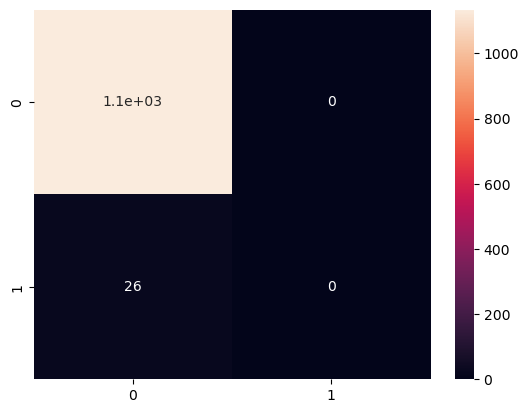

In [218]:
#Heatmap of SVM model
sns.heatmap(cm_svm, annot=True)

In [219]:
from sklearn.preprocessing import label_binarize
#Binarizes the multiclass labels (Y) into one-hot encoded vectors using label_binarize 
yb = label_binarize(Y, classes=[0,1])

In [220]:
#Assigns the number of columns (nc) in the binarized labels array (yb
nc = yb.shape[1]

In [221]:
#Creates a one-vs-rest classifier using Support Vector Machines (SVM) with a linear kernel, enabling probability estimates, and setting a fixed random state of 42
classifier = OneVsRestClassifier(SVC(kernel='linear', probability=True, random_state=42))

In [222]:
#decision function scores for the test data
Y_score = classifier.fit(X_train, Y_train).decision_function(X_test)

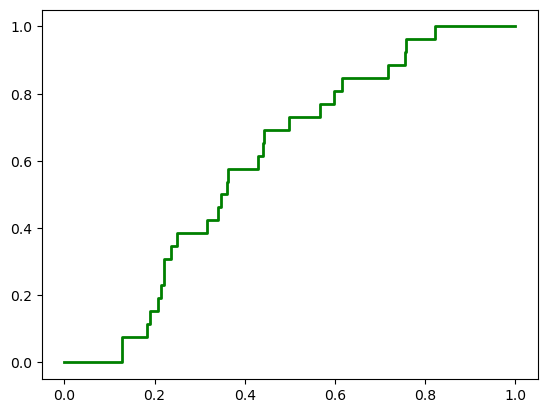

In [227]:
fpr = []
tpr = []
roc_auc = []

# Now, the loop should work as intended.
for i in range(nc):
    fpr_i, tpr_i, _ = roc_curve(Y_test, Y_score[:, i], pos_label=2)
    roc_auc_i = auc(fpr_i, tpr_i)
    
    # Append values to lists
    fpr.append(fpr_i)
    tpr.append(tpr_i)
    roc_auc.append(roc_auc_i)
    
plt.plot(fpr_i, tpr_i, color='green', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_i))

# SVM - Grid Search

In [228]:
#Grid Search

param_grid_svm = {
    'C' : [0.1, 1, 10, 100],
    'kernel' : ['linear', 'rbf', 'poly', 'sigmoid']
}

In [229]:
#Training the model
svcm = SVC()

In [230]:
#Initializes a grid search using the SVM classifier (svcm) with the specified parameter grid and 5-fold cross-validation
grid_search = GridSearchCV(svcm, param_grid_svm, cv=5)

In [231]:
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [232]:
#Finding the best hyper parameter
best_param_svm = grid_search.best_params_
print("Best hyperparameter : ", best_param_svm)

Best hyperparameter :  {'C': 10, 'kernel': 'rbf'}


In [233]:
#Creates a SVM classifier with the best hyperparameters obtained from a grid search
best_svm = SVC(C=best_param_svm['C'], kernel=best_param_svm['kernel'])

In [234]:
#Fits the SVM classifier (best_svm) to the training data (X_train, Y_train) using the previously determined best hyperparameters.
best_svm.fit(X_train, Y_train)

SVC(C=10)

In [235]:
#Making predictions on the test data
Y_pred_svm_gs = best_svm.predict(X_test)

In [236]:
#Accuracy of SVM model after grid search
SVM_GS_acc = accuracy_score(Y_test, Y_pred_svm_gs)
print("Accuracy after Grid Search : {:.2f}%". format(SVM_GS_acc * 100))

Accuracy after Grid Search : 98.71%


In [237]:
#Classification report of SVM model after grid search
print(classification_report(Y_test, Y_pred_svm_gs))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1134
           2       1.00      0.42      0.59        26

    accuracy                           0.99      1160
   macro avg       0.99      0.71      0.79      1160
weighted avg       0.99      0.99      0.98      1160



In [238]:
#Confusion matrix of SVM model after grid search
cm_svm_gs = confusion_matrix(Y_test, Y_pred_svm_gs)
print('Confusion matrix : ')
print(cm_svm_gs)
print('True Positives(TP) = ', cm_svm_gs[0,0])
print('True Negatives(TN) = ', cm_svm_gs[1,1])
print('False Positives(FP) = ', cm_svm_gs[0,1])
print('False Negatives(FN) = ', cm_svm_gs[1,0])

Confusion matrix : 
[[1134    0]
 [  15   11]]
True Positives(TP) =  1134
True Negatives(TN) =  11
False Positives(FP) =  0
False Negatives(FN) =  15


<Axes: >

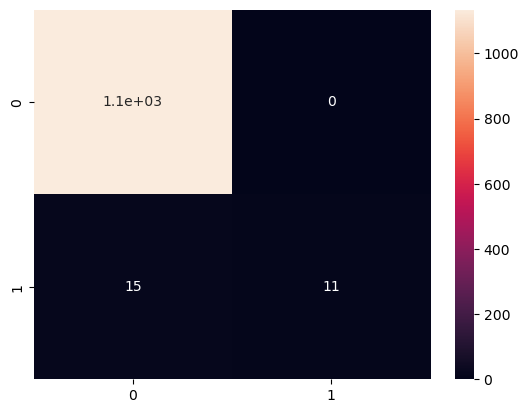

In [239]:
#Heatmap of SVM model after grid search
sns.heatmap(cm_svm_gs, annot=True)

# SVM - Randomized Search

In [240]:
#Tuning the model with Random Search

param_grid_svm_rs = {
    'C' : [0.1, 1, 10, 100],
    'kernel' : ['linear', 'rbf', 'poly', 'sigmoid']
}

In [241]:
#Training the model
svcm_rs = SVC()

In [242]:
##Initializes a randomized search using the SVM classifier (svcm) with the specified parameter grid and 5-fold cross-validation
random_search = RandomizedSearchCV(svcm_rs, param_grid_svm_rs, cv=5)

In [243]:
random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': [0.1, 1, 10, 100],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']})

In [244]:
#Finding the best hyper parameter
best_param_svm_rs = random_search.best_params_
print("Best Parameter : ", best_param_svm_rs)

Best Parameter :  {'kernel': 'poly', 'C': 10}


In [245]:
#Creates a SVM classifier with the best hyperparameters obtained from a randomized search
best_svm_rs = SVC(C=best_param_svm_rs['C'], kernel=best_param_svm_rs['kernel'])

In [246]:
#Fits the SVM classifier (best_svm) to the training data (X_train, Y_train) using the previously determined best hyperparameters.
best_svm_rs.fit(X_train, Y_train)

SVC(C=10, kernel='poly')

In [247]:
#Making predictions on the test data
Y_pred_svm_rs = best_svm_rs.predict(X_test)

In [248]:
#Accuracy of SVM model after randomized search
SVM_RS_acc = accuracy_score(Y_test, Y_pred_svm_rs)
print("Accuracy after Randomized Search: {:.2f}%" . format(SVM_RS_acc * 100))

Accuracy after Randomized Search: 98.71%


In [249]:
#Classification report of SVM model after randomized search
print(classification_report(Y_test, Y_pred_svm_rs))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1134
           2       0.87      0.50      0.63        26

    accuracy                           0.99      1160
   macro avg       0.93      0.75      0.81      1160
weighted avg       0.99      0.99      0.99      1160



In [250]:
#Confusion matrix of SVM model after randomized search
cm_svm_rs = confusion_matrix(Y_test, Y_pred_svm_rs)
print('Confusion matrix : ')
print(cm_svm_rs)
print('True Positives(TP) = ', cm_svm_rs[0,0])
print('True Negatives(TN) = ', cm_svm_rs[1,1])
print('False Positives(FP) = ', cm_svm_rs[0,1])
print('False Negatives(FN) = ', cm_svm_rs[1,0])

Confusion matrix : 
[[1132    2]
 [  13   13]]
True Positives(TP) =  1132
True Negatives(TN) =  13
False Positives(FP) =  2
False Negatives(FN) =  13


<Axes: >

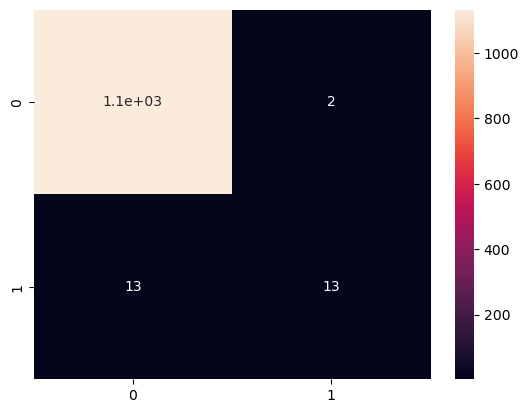

In [251]:
#Heatmap of SVM model after randomized search
sns.heatmap(cm_svm_rs, annot=True)

In [257]:
# Create a dictionary to store accuracy values for each model
df1 = {
    "Algorithm": ["Logistic Regression", "k-NN", "SVM", "Decision Tree", ],
    "Accuracy": [LR_acc, KNN_acc, SVM_acc, DT_acc],
}

# Create a Pandas DataFrame from the dictionary
df2 = pd.DataFrame(df1)

# Display the DataFrame as a table
df2

,Algorithm,Accuracy
0,Logistic Regression,0.977586
1,k-NN,0.979310
2,SVM,0.977586
3,Decision Tree,0.990517


# Conclusion :- After applying the suitable algorithms on the data set algorithms like Logistic, KNN, Decision Tree, SVM.we can see that the KNN giving the best Accuracy so we can conclude that we will use KNN for our model.